In [1]:
import os, sys
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec
import scipy

cwd = os.getcwd()
model_path = os.path.abspath(os.path.join(cwd, os.pardir, 'models'))
sys.path.append(model_path)
from conference_model import *

In [2]:
df = pd.read_csv('../data/SFHH_ConferenceNetwork.dat', delim_whitespace=True, header=None, names=['Timestamp', 'ID1', 'ID2'])
sorted_df = pd.DataFrame(np.sort(df[['ID1', 'ID2']], axis=1), columns=['ID1', 'ID2'])
interaction_counts = sorted_df.groupby(['ID1', 'ID2']).size()

Tadj = weighted_contact_matrix(df, 90)
upper_tri = scipy.sparse.triu(Tadj, k=1)
non_zero_values = upper_tri.data

/var/folders/v2/rqs_xyvn6b35jq2hrnw5_fsr0000gp/T/ipykernel_810/115906661.py:1: FutureWarning: The 'delim_whitespace' keyword in pd.read_csv is deprecated and will be removed in a future version. Use ``sep='\s+'`` instead
  df = pd.read_csv('../data/SFHH_ConferenceNetwork.dat', delim_whitespace=True, header=None, names=['Timestamp', 'ID1', 'ID2'])


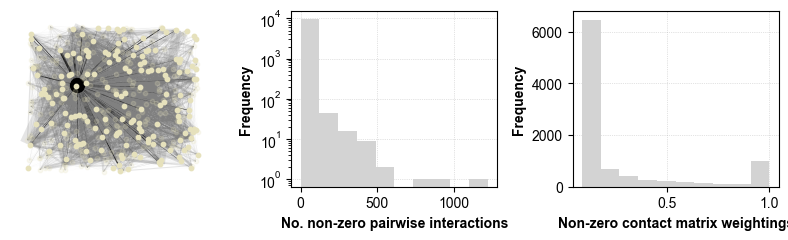

In [ ]:
plt.rcParams['font.family'] = 'Arial'
# Count the frequency of interactions
interaction_counts = df.groupby(['ID1', 'ID2']).size().reset_index(name='weight')

# Create a graph
G = nx.Graph()
for idx, row in interaction_counts.iterrows():
    G.add_edge(row['ID1'], row['ID2'], weight=row['weight'])

# Identify the node with the highest degree
max_degree_node = max(G.nodes, key=G.degree)

# Node properties
node_alpha = {node: 0.2 for node in G.nodes}
node_size = {node: 10 for node in G.nodes}
node_color = {node: '#E6E1BC' for node in G.nodes}
node_alpha[max_degree_node] = 1
node_size[max_degree_node] = 100
node_color[max_degree_node] = 'black'
for neighbor in G.neighbors(max_degree_node):
    node_alpha[neighbor] = 1

# Edge color settings
edge_color = {edge: 'grey' if max_degree_node not in edge else 'black' for edge in G.edges}

# Compute edge weights
scaling_factor = 0.02
weights = [G[u][v]['weight'] * scaling_factor for u, v in G.edges()]

# Your existing data processing
sorted_df = pd.DataFrame(np.sort(df[['ID1', 'ID2']], axis=1), columns=['ID1', 'ID2'])
interaction_counts_vals = sorted_df.groupby(['ID1', 'ID2']).size()

Tadj = weighted_contact_matrix(df, 90)
upper_tri = scipy.sparse.triu(Tadj, k=1)
non_zero_values = upper_tri.data

# Setup 1x3 subplot
fig, axs = plt.subplots(1, 3, figsize=(8, 2.5))
plt.rcParams['font.family'] = 'Arial'

# --- Plot 1: Network on axs[0]
pos = nx.random_layout(G)
for node in G.nodes():
    nx.draw_networkx_nodes(
        G, pos, nodelist=[node],
        node_color=node_color[node],
        alpha=node_alpha[node],
        node_size=node_size[node],
        ax=axs[0]
    )
for (u, v), color in edge_color.items():
    weight = G[u][v]['weight'] * scaling_factor
    nx.draw_networkx_edges(
        G, pos, edgelist=[(u, v)],
        width=weight,
        alpha=1 if color == 'black' else 0.2,
        edge_color=color,
        ax=axs[0]
    )
axs[0].axis('off')

# --- Plot 2: Histogram of interaction counts on axs[1]
axs[1].hist(interaction_counts_vals, bins=10, color='lightgrey', zorder=2)
axs[1].set_xlabel('No. non-zero pairwise interactions', weight='bold', fontsize=10)
axs[1].set_ylabel('Frequency', weight='bold', fontsize=10)
axs[1].set_yscale('log')
axs[1].grid('y', linestyle=':', linewidth=0.5, alpha=0.7, zorder=0)

# --- Plot 3: Histogram of non-zero matrix values on axs[2]
axs[2].hist(non_zero_values, bins=10, color='lightgrey', zorder=2)
axs[2].set_xlabel('Non-zero contact matrix weightings', weight='bold', fontsize=10)
axs[2].set_ylabel('Frequency', weight='bold', fontsize=10)
axs[2].grid('y', linestyle=':', linewidth=0.5, alpha=0.7, zorder=0)

plt.tight_layout()
plt.show()
